In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

Simulated x, y data to demonstrate a scatterplot and a linear regression.

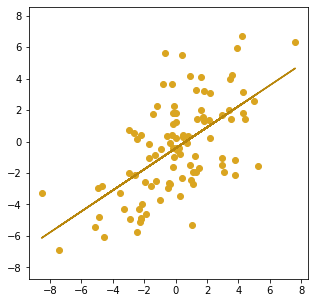

In [92]:
mean = [0, 0]
cov = [[7, 5], 
       [5, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100).T
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x.reshape(-1, 1), y)  # perform linear regression
Y_pred = linear_regressor.predict(x.reshape(-1, 1))  # make predictions

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.plot(x, y, 'o', color='goldenrod')
ax.plot(x, Y_pred, linestyle='solid', color='darkgoldenrod')
ax.axis('equal')
plt.savefig('sample_regression.png')

In [97]:
from sklearn import datasets
import pandas as pd

The built-in *Iris* dataset is formatted for `sklearn` examples. We want a regular flat data file to represent what someone might commonly work with when starting from scratch. 

Load the *Iris* dataset, inspect contents, and then build into a flat `pandas` dataframe:

In [113]:
iris = datasets.load_iris()

In [114]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [131]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [132]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The *Iris* dataset loads in long format, which is generally preferred. But we can use it to practice reshaping data using pandas.

In [133]:
iris_wide = pd.pivot(iris_df, columns='species')

In [134]:
iris_wide

sepal length (cm)                      sepal width (cm)             \
species            setosa versicolor virginica           setosa versicolor   
0                     5.1        NaN       NaN              3.5        NaN   
1                     4.9        NaN       NaN              3.0        NaN   
2                     4.7        NaN       NaN              3.2        NaN   
3                     4.6        NaN       NaN              3.1        NaN   
4                     5.0        NaN       NaN              3.6        NaN   
..                    ...        ...       ...              ...        ...   
145                   NaN        NaN       6.7              NaN        NaN   
146                   NaN        NaN       6.3              NaN        NaN   
147                   NaN        NaN       6.5              NaN        NaN   
148                   NaN        NaN       6.2              NaN        NaN   
149                   NaN        NaN       5.9              NaN        NaN   

                  petal length (cm)                      petal width (cm)  \
species virginica            setosa versicolor virginica           setosa   
0             NaN               1.4        NaN       NaN              0.2   
1             NaN               1.4        NaN       NaN              0.2   
2             NaN               1.3        NaN       NaN              0.2   
3             NaN               1.5        NaN       NaN              0.2   
4             NaN               1.4        NaN       NaN              0.2   
..            ...               ...        ...       ...              ...   
145           3.0               NaN        NaN       5.2              NaN   
146           2.5               NaN        NaN       5.0              NaN   
147           3.0               NaN        NaN       5.2              NaN   
148           3.4               NaN        NaN       5.4              NaN   
149           3.0               NaN        NaN       5.1              NaN   

                              
species versicolor virginica  
0              NaN       NaN  
1              NaN       NaN  
2              NaN       NaN  
3              NaN       NaN  
4              NaN       NaN  
..             ...       ...  
145            NaN       2.3  
146            NaN       1.9  
147            NaN       2.0  
148            NaN       2.3  
149            NaN       1.8  

[150 rows x 12 columns]

The pairplot example uses the Boston dataset to avoid giving away some of the fun parts of analyzing the Iris dataset.

In [138]:
boston = datasets.load_boston()

In [139]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [140]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['target'] = boston.target

In [141]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [142]:
import seaborn as sns

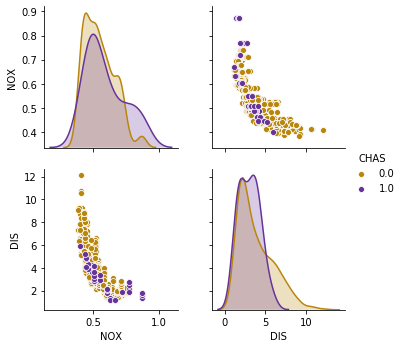

In [186]:
pair_fig = sns.pairplot(boston_df, vars=['NOX', 'DIS'], hue='CHAS', palette=('darkgoldenrod', 'rebeccapurple'))
pair_fig.savefig('boston_pairplot.png')

A simulated log-normal distribution for demonstrating some distribution graphing tools on skewed data.

In [169]:
import math
sim = [math.log(i) for i in np.random.normal(loc=10, scale=3, size=1000)]

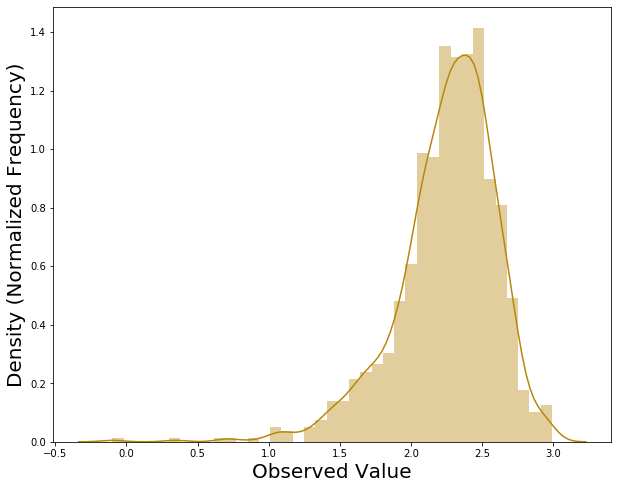

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sim_plot = sns.distplot(sim, color='darkgoldenrod')
ax.set_xlabel('Observed Value', fontsize=20)
ax.set_ylabel('Density (Normalized Frequency)', fontsize=20)
plt.savefig('simulated_lognormal.png')

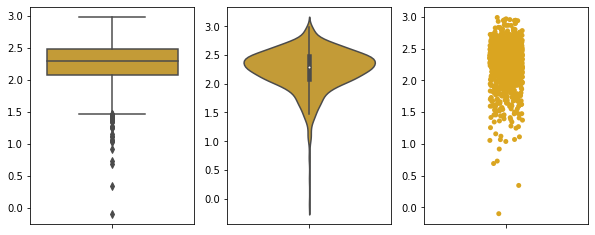

In [199]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
sns.boxplot(sim, ax=ax[0], orient='v', color='goldenrod')
sns.violinplot(sim, ax=ax[1], orient='v', color='goldenrod')
sns.stripplot(sim, ax=ax[2], orient='v', color='goldenrod')
plt.savefig('distribution_visualization.png')

This figure was never used, but it's still a handy way of looking at normal distributions and their standard deviations:

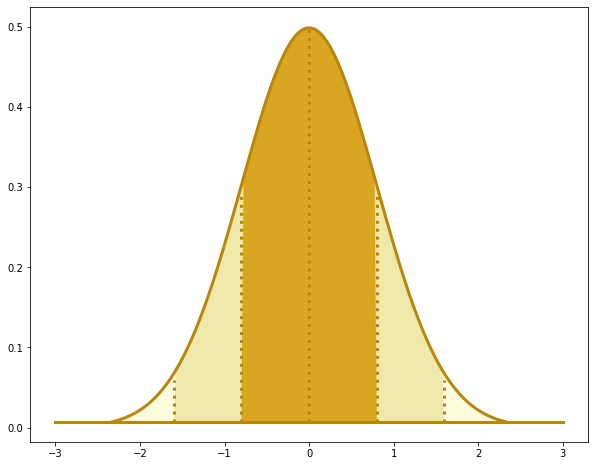

In [71]:
# grab some x values
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

# get the corresponding y values for the normal pdf
rv = norm(loc=0, scale=0.8)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(x, rv.pdf(x), 'darkgoldenrod', lw=3, label='frozen pdf')
ax.fill(x, rv.pdf(x), 'lightgoldenrodyellow', alpha=0.75)

# zip coordinates
x_y = [i for i in zip(x, rv.pdf(x))]
std_1_coords = [(i[0], i[1]) for i in x_y if i[0] > -0.8 and i[0] < 0.8]
std_2_coords = [(i[0], i[1]) for i in x_y if i[0] > -1.6 and i[0] < 1.6]

# mean
ax.plot([-3, 3], [0.007, 0.007], 'darkgoldenrod', lw=3)

# bottom
ax.plot([0, 0], [0.007, 0.5], 'darkgoldenrod', linestyle='dotted', lw=3)

# +/- two standard deviations
std_2_x = [-1.6] + [i[0] for i in std_2_coords] + [1.6]
std_2_y = [0.007] + [i[1] for i in std_2_coords] + [0.007]
ax.plot([-1.6, -1.6], [0.007, 0.06], 'darkgoldenrod', linestyle='dotted', lw=3)
ax.plot([1.6, 1.6], [0.007, 0.06], 'darkgoldenrod', linestyle='dotted', lw=3)
ax.fill(std_2_x, std_2_y, 'palegoldenrod')

# +/- one standard deviation
std_1_x = [-0.8] + [i[0] for i in std_1_coords] + [0.8]
std_1_y = [0.007] + [i[1] for i in std_1_coords] + [0.007]
ax.plot([-0.8, -0.8], [0.007, 0.29], 'darkgoldenrod', linestyle='dotted', lw=3)
ax.plot([0.8, 0.8], [0.007, 0.29], 'darkgoldenrod', linestyle='dotted', lw=3)
ax.fill(std_1_x, std_1_y, 'goldenrod')

plt.savefig('mean_0_std_0.8.png')